<a href="https://colab.research.google.com/github/rajviishah/Real-Estate-Investment/blob/main/Clustering-Techniques/kMeans-Hierarchical-Rajvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Applying KMeans Clustering (using scikit learn) and Hierarchical Clustering (using scikit learn) on preprocessed data**

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/257/clean_train.csv', nrows= 10000)
dataset.head(10)

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,8450,7,5,2003,2003,706,0,150,6.752270,856,854,0,7.444249,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,2,20,9600,6,8,1976,1976,978,0,284,7.140453,1262,0,0,7.140453,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,3,60,11250,7,5,2001,2002,486,0,434,6.824374,920,866,0,7.487734,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,4,70,9550,7,5,1915,1970,216,0,540,6.628041,961,756,0,7.448334,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4,5,60,14260,8,5,2000,2000,655,0,490,7.043160,1145,1053,0,7.695303,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,5,6,50,14115,5,5,1993,1995,732,0,64,6.679599,796,566,0,7.216709,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,11.870600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,6,7,20,10084,8,5,2004,2005,1369,0,317,7.430114,1694,0,0,7.434848,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,12.634603,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,7,8,60,10382,7,6,1973,1973,859,32,216,7.009409,1107,983,0,7.644919,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,12.206073,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,8,9,50,6120,7,5,1931,1950,0,0,952,6.858565,1022,752,0,7.480992,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,11.774520,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,9,10,190,7420,5,6,1939,1950,851,0,140,6.898715,1077,0,0,6.981935,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,11.678440,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

#**Applying Hierarchical Clustering**

In [ ]:
from sklearn.preprocessing import normalize

data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
data_scaled.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000108,0.006479,0.912516,0.000756,0.000540,0.216304,0.216304,0.076241,0.0,0.016199,0.000729,0.092440,0.092224,0.0,0.000804,0.000108,0.000000,0.000216,0.000108,0.000324,0.000108,0.000864,0.000000,0.000216,0.059179,0.000000,0.006587,0.000000,0.0,0.0,0.0,0.0,0.000216,0.216844,0.001323,0.000108,0.0,0.0,0.0,0.000108,...,0.0,0.000000,0.0,0.0,0.0,0.000108,0.0,0.0,0.0,0.0,0.000108,0.0,0.0,0.000108,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000108,0.0,0.0,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000108,0.000000,0.0,0.0,0.0,0.000108,0.0
1,0.000193,0.001934,0.928378,0.000580,0.000774,0.191091,0.191091,0.094579,0.0,0.027465,0.000691,0.122043,0.000000,0.0,0.000691,0.000000,0.000097,0.000193,0.000000,0.000290,0.000097,0.000580,0.000097,0.000193,0.044485,0.028818,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000484,0.194089,0.001171,0.000097,0.0,0.0,0.0,0.000097,...,0.0,0.000000,0.0,0.0,0.0,0.000097,0.0,0.0,0.0,0.0,0.000097,0.0,0.0,0.000000,0.000097,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,0.0,0.0,0.000097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,0.000000,0.0,0.0,0.0,0.000097,0.0
2,0.000253,0.005053,0.947411,0.000590,0.000421,0.168513,0.168597,0.040928,0.0,0.036549,0.000575,0.077477,0.072930,0.0,0.000631,0.000084,0.000000,0.000168,0.000084,0.000253,0.000084,0.000505,0.000084,0.000168,0.051202,0.000000,0.003537,0.000000,0.0,0.0,0.0,0.0,0.000758,0.169102,0.001037,0.000084,0.0,0.0,0.0,0.000084,...,0.0,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.000084,0.0,0.0,0.000084,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000084,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000084,0.000000,0.0,0.0,0.0,0.000084,0.0
3,0.000390,0.006828,0.931538,0.000683,0.000488,0.186795,0.192160,0.021069,0.0,0.052673,0.000647,0.093739,0.073743,0.0,0.000727,0.000098,0.000000,0.000098,0.000000,0.000293,0.000098,0.000683,0.000098,0.000293,0.062623,0.000000,0.003414,0.026532,0.0,0.0,0.0,0.0,0.000195,0.195672,0.001156,0.000098,0.0,0.0,0.0,0.000098,...,0.0,0.000098,0.0,0.0,0.0,0.000098,0.0,0.0,0.0,0.0,0.000098,0.0,0.0,0.000098,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000098,0.0,0.0,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000098,0.000098,0.0,0.0,0.0,0.000000,0.0
4,0.000338,0.004052,0.963127,0.000540,0.000338,0.135081,0.135081,0.044239,0.0,0.033095,0.000476,0.077334,0.071120,0.0,0.000520,0.000068,0.000000,0.000135,0.000068,0.000270,0.000068,0.000608,0.000068,0.000203,0.056464,0.012968,0.005673,0.000000,0.0,0.0,0.0,0.0,0.000810,0.135621,0.000839,0.000068,0.0,0.0,0.0,0.000068,...,0.0,0.000000,0.0,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.000068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000068,0.000000,0.0,0.0,0.0,0.000068,0.0


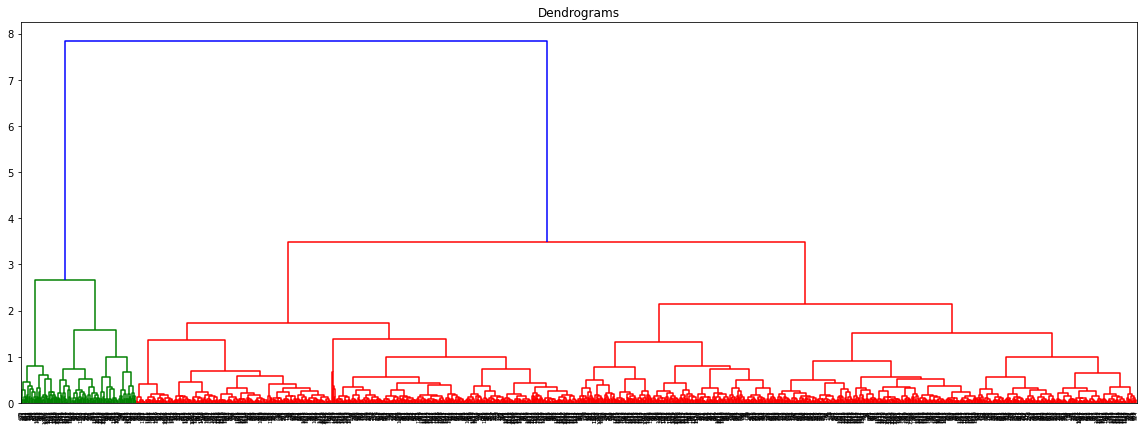

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

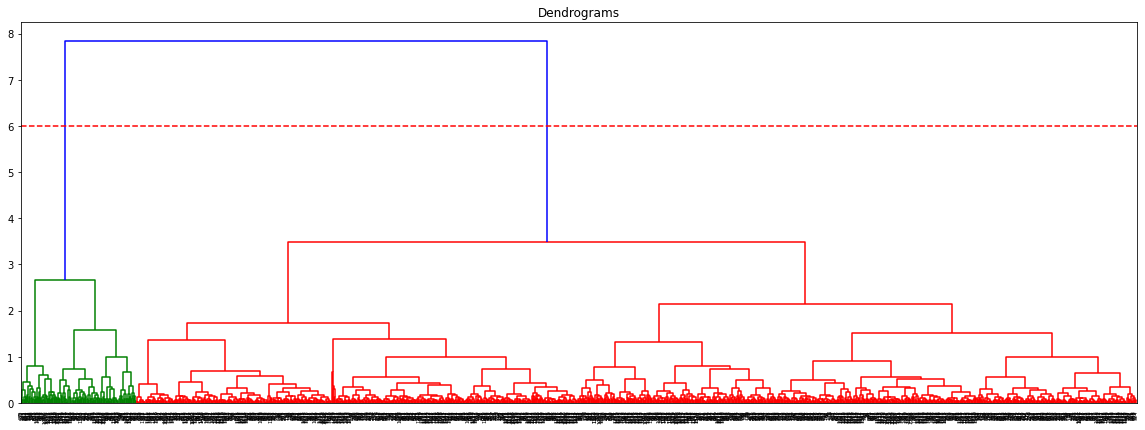

In [ ]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

#**Applying KMeans using scikit learn**

In [ ]:
scaler =  StandardScaler()
scaler.fit(dataset)
X_scaled = scaler.transform(dataset)

In [ ]:
pca = PCA(n_components = 2)
data_embeddings = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.cluster import KMeans

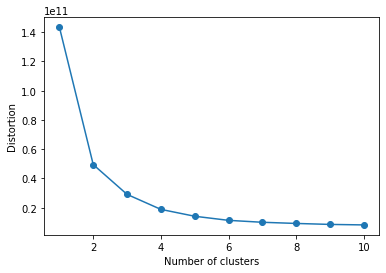

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
clusters = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )

In [ ]:
y_output = clusters.fit_predict(dataset)
y_output

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

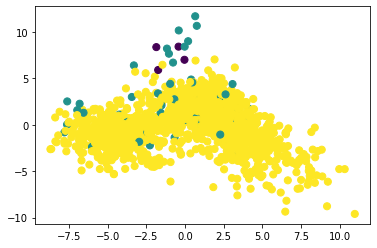

In [ ]:
plt.scatter(data_embeddings[:, 0], data_embeddings[:, 1], c=y_output, s=50, cmap='viridis')